In [125]:
import pandas as pd
import numpy as np
import seaborn as sns

In [126]:
df=pd.read_csv("medical_cost_insurance.csv")

In [127]:
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [128]:
df.columns


Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

In [129]:
df.columns
#checking out null values in datasets (np.nan, None, NAN,others)
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [130]:
#checking out the data types of each columns in datasets

df.dtypes

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

In [131]:
#checking out the data types of each columns in datasets

df.loc[df['charges']==" "]

,age,sex,bmi,children,smoker,region,charges


In [132]:
df.describe()


,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


<AxesSubplot:>

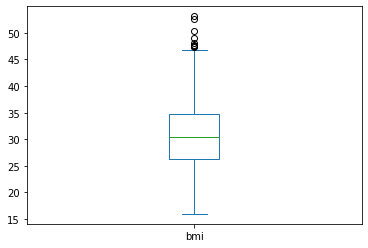

In [133]:
#checking otlier as there is large difference in 75th percentile and max
df['bmi'].plot.box()

In [134]:
#making a dataframe of nominal data
df_visualization_nominal=df[['sex', 'smoker', 'region']].copy()

In [135]:
df_visualization_nominal

,sex,smoker,region
0,female,yes,southwest
1,male,no,southeast
2,male,no,southeast
3,male,no,northwest
4,male,no,northwest
...,...,...,...
1333,male,no,northwest
1334,female,no,northeast
1335,female,no,southeast
1336,female,no,southwest


male      676
female    662
Name: sex, dtype: int64


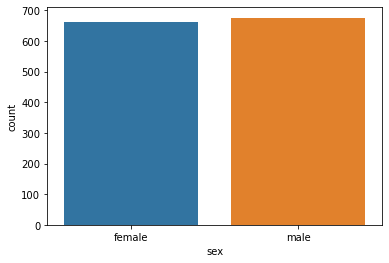

In [136]:
ax=sns.countplot(x="sex",data=df_visualization_nominal)
print(df_visualization_nominal["sex"].value_counts())

no     1064
yes     274
Name: smoker, dtype: int64


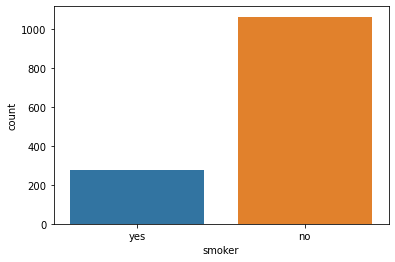

In [137]:
ax=sns.countplot(x="smoker",data=df_visualization_nominal)
print(df_visualization_nominal["smoker"].value_counts())

southeast    364
southwest    325
northwest    325
northeast    324
Name: region, dtype: int64


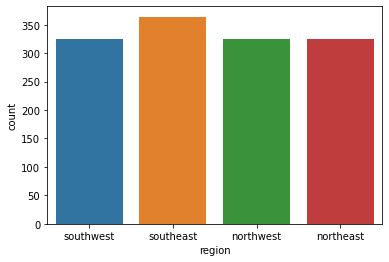

In [138]:
ax=sns.countplot(x="region",data=df_visualization_nominal)
print(df_visualization_nominal["region"].value_counts())

In [139]:
#making a dataframe of or datadinal
df_visualization_ordinal=df[['age', 'children']].copy()

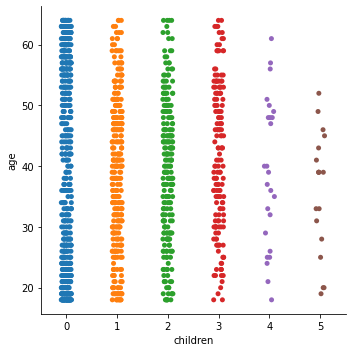

In [140]:
sns.catplot(x="children",y='age', data=df_visualization_ordinal)

In [141]:
#making a dataframe for continous column
df_visualization_cont=df[['bmi', 'charges']].copy()

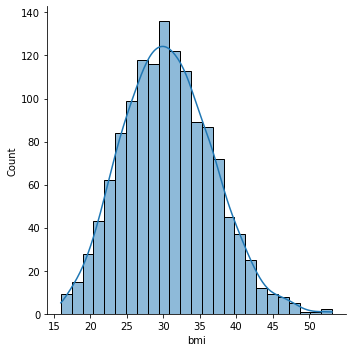

In [142]:
sns.displot(df_visualization_cont['bmi'],kde=True)

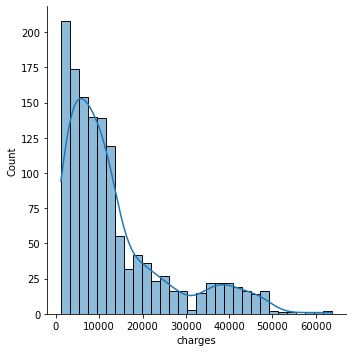

In [143]:
sns.displot(df_visualization_cont['charges'],kde=True)

In [144]:
df.describe()


,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


<AxesSubplot:>

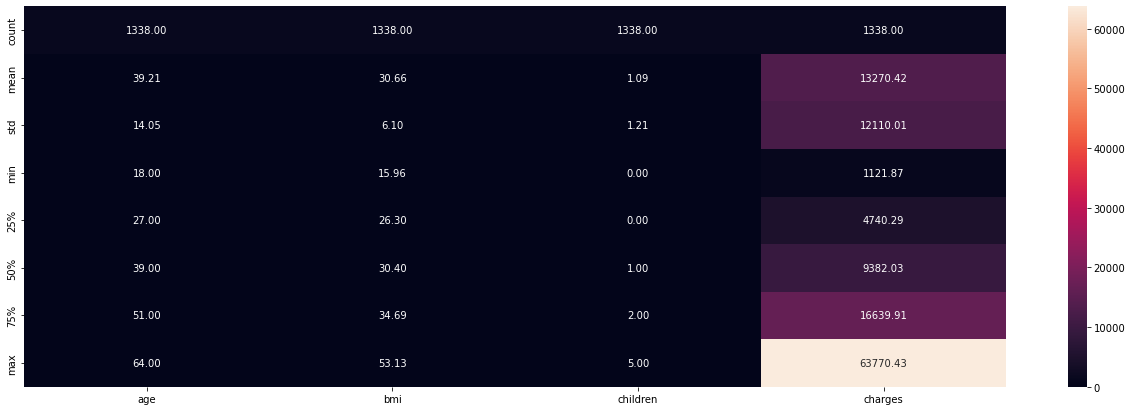

In [145]:
import matplotlib.pyplot as plt
plt.figure(figsize=(22,7))
sns.heatmap(df.describe(),annot=True,linecolor='black',fmt="0.2f")

In [146]:
df.corr()["charges"].sort_values()

children    0.067998
bmi         0.198341
age         0.299008
charges     1.000000
Name: charges, dtype: float64

<AxesSubplot:>

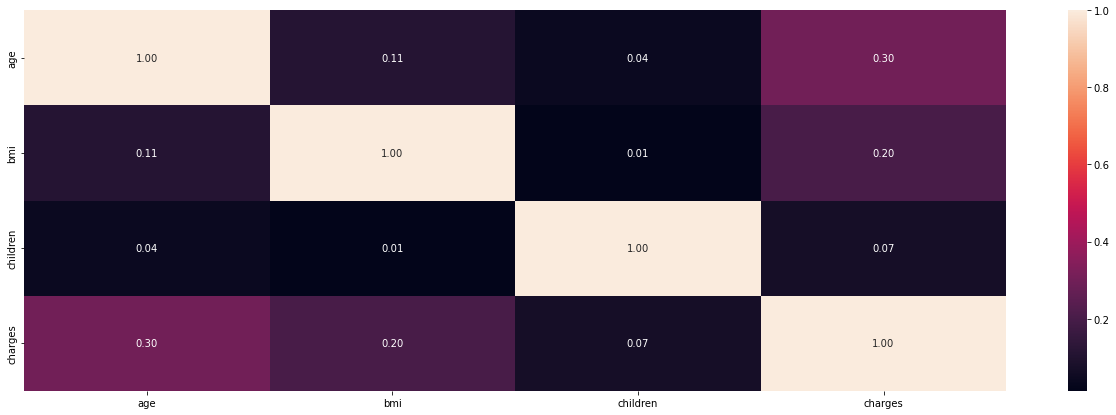

In [147]:
plt.figure(figsize=(22,7))
sns.heatmap(df.corr(),annot=True,linecolor='black',fmt="0.2f")

<function matplotlib.pyplot.show(close=None, block=None)>

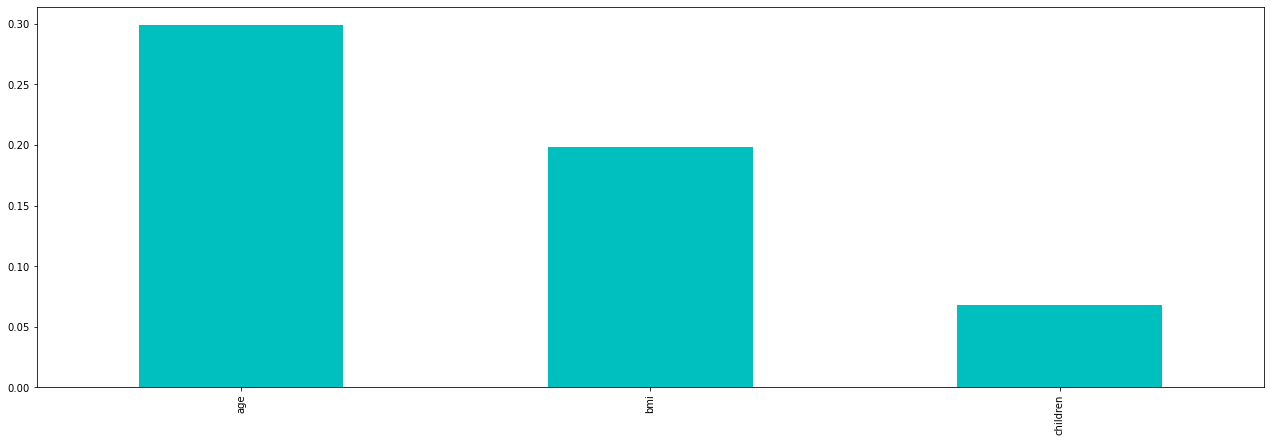

In [148]:
plt.figure(figsize=(22,7))
df.corr()['charges'].sort_values(ascending=False).drop(["charges"]).plot(kind='bar',color='c')
plt.show

In [149]:
df.skew()

C:\Users\shilp\AppData\Local\Temp/ipykernel_29856/1665899112.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df.skew()


age         0.055673
bmi         0.284047
children    0.938380
charges     1.515880
dtype: float64

In [150]:
# keeping  -+0.5 skewness else , here are the columns not lie in the range
#children categorical and charges 
#checking outliers in int and float values never check on categorical variable


In [151]:
#here charges are target values no skewness correction applied
#children is categorical column


<AxesSubplot:>

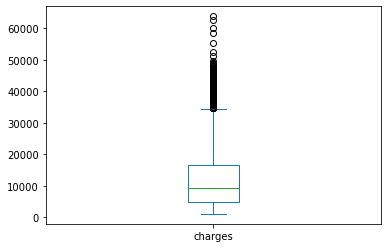

In [152]:
#checking otlier as there is large difference in 75th percentile and max
df['charges'].plot.box()

<AxesSubplot:>

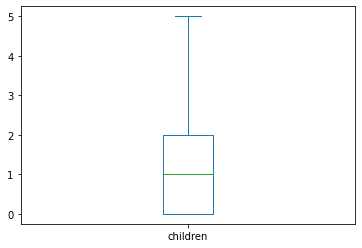

In [153]:
df['children'].plot.box() # no outliers

In [154]:
#since the data has lot of string values so need to encode the data

from sklearn.preprocessing import OrdinalEncoder
enc=OrdinalEncoder()

In [155]:
for i in df.columns:
    if df[i].dtypes=="object":
        df[i]=enc.fit_transform(df[i].values.reshape(-1,1))

In [156]:
df

,age,sex,bmi,children,smoker,region,charges
0,19,0.0,27.900,0,1.0,3.0,16884.92400
1,18,1.0,33.770,1,0.0,2.0,1725.55230
2,28,1.0,33.000,3,0.0,2.0,4449.46200
3,33,1.0,22.705,0,0.0,1.0,21984.47061
4,32,1.0,28.880,0,0.0,1.0,3866.85520
...,...,...,...,...,...,...,...
1333,50,1.0,30.970,3,0.0,1.0,10600.54830
1334,18,0.0,31.920,0,0.0,0.0,2205.98080
1335,18,0.0,36.850,0,0.0,2.0,1629.83350
1336,21,0.0,25.800,0,0.0,3.0,2007.94500


In [157]:
df.shape

(1338, 7)

In [158]:
# removing otliers via Z score methods

from scipy.stats import zscore
import numpy as np


In [159]:
z=np.abs(zscore(df))
thershold=3
print(np.where(z>3))

(array([  32,   34,   71,  116,  166,  413,  425,  438,  543,  568,  577,
        640,  819,  847,  877,  932,  937,  969,  984, 1047, 1085, 1116,
       1130, 1146, 1230, 1245, 1272, 1300, 1317], dtype=int64), array([3, 6, 3, 2, 3, 3, 3, 3, 6, 3, 6, 3, 6, 2, 3, 3, 3, 3, 3, 2, 3, 3,
       3, 6, 6, 3, 3, 6, 2], dtype=int64))


In [160]:
z[32:3]

,age,sex,bmi,children,smoker,region,charges


In [161]:
df_new_z=df[(z<3).all(axis=1)]
df_new_z

,age,sex,bmi,children,smoker,region,charges
0,19,0.0,27.900,0,1.0,3.0,16884.92400
1,18,1.0,33.770,1,0.0,2.0,1725.55230
2,28,1.0,33.000,3,0.0,2.0,4449.46200
3,33,1.0,22.705,0,0.0,1.0,21984.47061
4,32,1.0,28.880,0,0.0,1.0,3866.85520
...,...,...,...,...,...,...,...
1333,50,1.0,30.970,3,0.0,1.0,10600.54830
1334,18,0.0,31.920,0,0.0,0.0,2205.98080
1335,18,0.0,36.850,0,0.0,2.0,1629.83350
1336,21,0.0,25.800,0,0.0,3.0,2007.94500


In [162]:
df_new_z.shape

(1309, 7)

In [163]:
#percentage of data loss:

data_loss=((1338-1309)/1338)*100
data_loss

2.167414050822123

In [164]:
features=df_new_z.drop("charges",axis=1)
target=df_new_z["charges"]


In [165]:
from sklearn.preprocessing import MinMaxScaler
mms=MinMaxScaler()
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split

In [166]:
for i in range(0,100):
    features_train,features_test,target_train,target_test= train_test_split(features,target,test_size=0.2,random_state=i)
    lr.fit(features_train,target_train)
    pred_train= lr.predict(features_train)
    pred_test= lr.predict(features_test)
    print("at random state",i,"the training accuracy is : ",r2_score(traget_train,pred_train))
    print("at random state",i,"the testing accuracy is : ",r2_score(target_test,pred_test))
    print("\n")

at random state 0 the training accuracy is :  0.7417605652316128
at random state 0 the testing accuracy is :  0.7892477599105713


at random state 1 the training accuracy is :  -0.8030613354763245
at random state 1 the testing accuracy is :  0.7549280680101378


at random state 2 the training accuracy is :  -0.7643208549531841
at random state 2 the testing accuracy is :  0.7163471107004836


at random state 3 the training accuracy is :  -0.8303056643413438
at random state 3 the testing accuracy is :  0.7429714679722454


at random state 4 the training accuracy is :  -0.6656143309641911
at random state 4 the testing accuracy is :  0.735208886673008


at random state 5 the training accuracy is :  -0.8208807084356633
at random state 5 the testing accuracy is :  0.7460223930639374


at random state 6 the training accuracy is :  -0.8052382272712775
at random state 6 the testing accuracy is :  0.7672349193524791


at random state 7 the training accuracy is :  -0.8237950701313459
at random st

at random state 69 the training accuracy is :  -0.7594264439568372
at random state 69 the testing accuracy is :  0.8009526052816605


at random state 70 the training accuracy is :  -0.8776393343176845
at random state 70 the testing accuracy is :  0.7502035032024044


at random state 71 the training accuracy is :  -0.8400033864230052
at random state 71 the testing accuracy is :  0.7667668564100336


at random state 72 the training accuracy is :  -0.6936800562556087
at random state 72 the testing accuracy is :  0.8256637902479007


at random state 73 the training accuracy is :  -0.7759063892074884
at random state 73 the testing accuracy is :  0.7656259384613371


at random state 74 the training accuracy is :  -0.7570761358382623
at random state 74 the testing accuracy is :  0.7652748111238623


at random state 75 the training accuracy is :  -0.6646478932377482
at random state 75 the testing accuracy is :  0.7462930050228809


at random state 76 the training accuracy is :  -0.680633803106

In [167]:
features_train,features_test,target_train,target_test= train_test_split(features,target,test_size=0.2,random_state=0)

In [168]:
lr.fit(features_train,target_train)
    

LinearRegression()

In [169]:
 pred_test= lr.predict(features_test)
pred_test[3]



7194.594212387023

In [170]:
print(r2_score(target_test,pred_test))

0.7892477599105713


In [171]:
#cross validation

Train_accuracy=r2_score(target_train,pred_train)
Test_accuracy=r2_score(target_test,pred_test)

from sklearn.model_selection import cross_val_score
for j in range(2,10):
    cv_score=cross_val_score(lr,features,target,cv=j)
    cv_mean=cv_score.mean()
    print("at cross fold ",j,"the cv score is ",cv_mean,"and accuracy for train set",Train_accuracy," and test set is ",Test_accuracy)
    print("\n")

at cross fold  2 the cv score is  0.7507263874653844 and accuracy for train set -0.8432194592914044  and test set is  0.7892477599105713


at cross fold  3 the cv score is  0.7482863513140566 and accuracy for train set -0.8432194592914044  and test set is  0.7892477599105713


at cross fold  4 the cv score is  0.7464940705596477 and accuracy for train set -0.8432194592914044  and test set is  0.7892477599105713


at cross fold  5 the cv score is  0.7507037701961408 and accuracy for train set -0.8432194592914044  and test set is  0.7892477599105713


at cross fold  6 the cv score is  0.7479467120567999 and accuracy for train set -0.8432194592914044  and test set is  0.7892477599105713


at cross fold  7 the cv score is  0.7476013200228121 and accuracy for train set -0.8432194592914044  and test set is  0.7892477599105713


at cross fold  8 the cv score is  0.7450165785585103 and accuracy for train set -0.8432194592914044  and test set is  0.7892477599105713


at cross fold  9 the cv sco

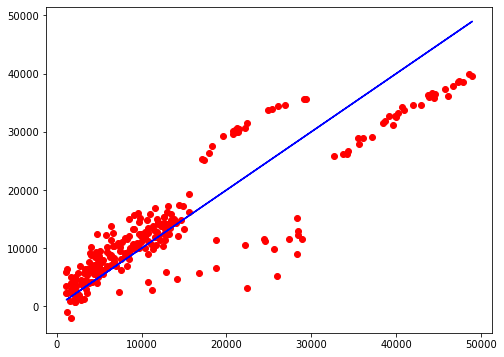

In [172]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8,6))
plt.scatter(x=target_test,y=pred_test,color='r')
plt.plot(target_test,target_test,color='b')
plt.show()

In [173]:
# predicting value with new data set

t=np.array([[28,0.0,33.00,3,0.0,2.0]])

In [174]:
t.reshape(1,-1)

array([[28.,  0., 33.,  3.,  0.,  2.]])

In [175]:
lr.predict(t)

array([7323.04008209])

In [177]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import Lasso,Ridge
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor

In [178]:
dtr=DecisionTreeRegressor()
svr=SVR()
knr=KNeighborsRegressor()
ls=Lasso(alpha=0.0001)
rd=Ridge(alpha=0.0001)
features_train,features_test,target_train,target_test
model=[dtr,svr,knr,ls,rd]

for m in model:
    m.fit(features_train,target_train)
    pred=m.predict(features_test)
    print('error:',m)
    print('Mean absolute error:',mean_absolute_error(target_test,pred))
    print('Mean squared error:',mean_squared_error(target_test,pred))
    print('Root Mean Squared error:',np.sqrt(mean_squared_error(target_test,pred)))

error: DecisionTreeRegressor()
Mean absolute error: 3242.7353880496185
Mean squared error: 42910926.22303925
Root Mean Squared error: 6550.643191552967
error: SVR()
Mean absolute error: 8736.718343162423
Mean squared error: 175303452.03224596
Root Mean Squared error: 13240.220996352213
error: KNeighborsRegressor()
Mean absolute error: 7938.202980721375
Mean squared error: 141098535.80489752
Root Mean Squared error: 11878.490468274895
error: Lasso(alpha=0.0001)
Mean absolute error: 4151.58177768361
Mean squared error: 32867489.200107757
Root Mean Squared error: 5733.01746030027
error: Ridge(alpha=0.0001)
Mean absolute error: 4151.583365353322
Mean squared error: 32867498.041052893
Root Mean Squared error: 5733.018231355356


In [179]:
for m in model:
    m.fit(features_train,target_train)
    pred=m.predict(features_test)
    print('score:',m)
    print(r2_score(target_test,pred))

score: DecisionTreeRegressor()
0.7330571188795545
score: SVR()
-0.12407720384108023
score: KNeighborsRegressor()
0.0952508592673621
score: Lasso(alpha=0.0001)
0.7892477590769968
score: Ridge(alpha=0.0001)
0.7892477023872696


In [ ]:
#here we can see the best model comes with Linear regression so saving the best model.

In [180]:
import joblib
joblib.dump(lr, "LR_Medicalcost.obj")

lr_from_joblib =joblib.load("LR_Medicalcost.obj")